In [30]:
import uproot4 as upr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import particle

functions

In [31]:
def get_mass_from_pdgid(pdgid):
    try:
        particle_info = particle.Particle.from_pdgid(pdgid)
        if particle_info is not None:
            return particle_info.mass * 1e-3  # Convert mass to GeV
        else:
            return np.NaN
    except Exception as e:
        print(f"Error occurred for PDG ID {pdgid}: {e}")
        return np.NaN

def rimappa_subentry(valore):
    mappa = {0: 'neutrino', 1: 'nucleon target'}
    return mappa.get(valore, valore)

In [118]:
tree = upr.open("/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/events-in-SANDtracker.0.gtrac.analysed.root")['gtrac_extended']

In [119]:
tree.keys()

['EvtNum',
 'NeutrinoFlavor',
 'isCCEvent',
 'EventType',
 'InteractionTargetPDG',
 'CCQEonHydrogen',
 'Interaction_vtxX',
 'Interaction_vtxY',
 'Interaction_vtxZ',
 'isInFiducialVolume',
 'InteractionTarget',
 'InteractionTargetFromGEO',
 'InteractionVolume',
 'InitialStatePDG',
 'InitialStateNames',
 'InitialStateMomenta',
 'InitialStateTotal4Momentum',
 'FinalStateLeptonPDG',
 'FinalStateLeptonNames',
 'FinalStateLepton4Momentum',
 'PrimaryStateHadronicSystemPDG',
 'PrimaryStateHadronicSystemNames',
 'PrimaryStateHadronicSystemMomenta',
 'PrimaryStateHadronicSystemTotal4Momentum',
 'PrimaryStateHadronicSystemTotalKinE',
 'PrimaryStateHadronicSystemTopology_code',
 'PrimaryStateHadronicSystemTopology_name',
 'FinalStateHadronicSystemPDG',
 'FinalStateHadronicSystemNames',
 'FinalStateHadronicSystemMomenta',
 'FinalStateHadronicSystemTotal4Momentum',
 'FinalStateHadronicSystemTotalKinE',
 'FinalStateHadronicSystemTopology_code',
 'FinalStateHadronicSystemTopology_name',
 'NuclearRemna

# Event Information

In [123]:
new_columns = {
    ('EventType', '', ''): 'EventType',
    ('CCQEonHydrogen', '', ''): 'CCQEonHydrogen',
    ('InteractionTarget', '', ''): 'NuclearTarget',
    ('InitialStateNames', '', ''): 'InitialStateParticlesNames',
    ('InitialStateTotal4Momentum', 'fP', 'fX'): 'InitialState_Px',
    ('InitialStateTotal4Momentum', 'fP', 'fY'): 'InitialState_Py',
    ('InitialStateTotal4Momentum', 'fP', 'fZ'): 'InitialState_Pz',
    ('InitialStateTotal4Momentum', 'fE', ''): 'InitialState_E',
    ('PrimaryStateHadronicSystemTotal4Momentum', 'fP', 'fX'): 'PrimaryHadronic_Px',
    ('PrimaryStateHadronicSystemTotal4Momentum', 'fP', 'fY'): 'PrimaryHadronic_Py',
    ('PrimaryStateHadronicSystemTotal4Momentum', 'fP', 'fZ'): 'PrimaryHadronic_Pz',
    ('PrimaryStateHadronicSystemTotal4Momentum', 'fE', ''): 'PrimaryHadronic_E',
    ('PrimaryStateHadronicSystemTotalKinE', '', ''): 'PrimaryHadronic_KinE',
    ('FinalStateHadronicSystemTotal4Momentum', 'fP', 'fX'): 'FinalHadronic_Px',
    ('FinalStateHadronicSystemTotal4Momentum', 'fP', 'fY'): 'FinalHadronic_Py',
    ('FinalStateHadronicSystemTotal4Momentum', 'fP', 'fZ'): 'FinalHadronic_Pz',
    ('FinalStateHadronicSystemTotal4Momentum', 'fE', ''): 'FinalHadronic_E',
    ('FinalStateHadronicSystemTotalKinE', '', ''): 'FinalHadronic_KinE',
    ('NuclearTotal4Momentum', 'fP', 'fX'): 'NuclearRemnant_Px',
    ('NuclearTotal4Momentum', 'fP', 'fY'): 'NuclearRemnant_Py',
    ('NuclearTotal4Momentum', 'fP', 'fZ'): 'NuclearRemnant_Pz',
    ('NuclearTotal4Momentum', 'fE', ''): 'NuclearRemnant_E',
    # checks energy momentum conservation
    ('PrimaryStateTotal4Momantum', 'fP', 'fX'): 'PrimaryState_Px',
    ('PrimaryStateTotal4Momantum', 'fP', 'fY'): 'PrimaryState_Py',
    ('PrimaryStateTotal4Momantum', 'fP', 'fZ'): 'PrimaryState_Pz',
    ('PrimaryStateTotal4Momantum', 'fE', ''): 'PrimaryState_E',
    ('FinalStateTotal4Momantum', 'fP', 'fX'): 'FinalState_Px',
    ('FinalStateTotal4Momantum', 'fP', 'fY'): 'FinalState_Py',
    ('FinalStateTotal4Momantum', 'fP', 'fZ'): 'FinalState_Pz',
    ('FinalStateTotal4Momantum', 'fE', ''): 'FinalState_E',
}

df = tree.arrays([
                  'EvtNum',
                  'InteractionTarget',
                  'InteractionTargetFromGEO',
                  'EventType',
                  'CCQEonHydrogen',
                  'InteractionVolume',
                  'Interaction_vtxX',
                  'Interaction_vtxY',
                  'Interaction_vtxZ',
                  'InitialStateTotal4Momentum',
                  'PrimaryStateHadronicSystemTotal4Momentum',
                  'PrimaryStateHadronicSystemTotalKinE',
                  'FinalStateHadronicSystemTotal4Momentum',
                  'FinalStateHadronicSystemTotalKinE',
                  'NuclearTotal4Momentum',
                  'PrimaryStateHadronicSystemTopology_name',
                  'FinalStateHadronicSystemTopology_name',
                  'PrimaryStateTotal4Momantum',
                  'FinalStateTotal4Momantum'
                  ], library='pd')

# Appiattire il MultiIndex delle colonne
df.columns = ['_'.join(filter(None, col)).strip() for col in df.columns.values]

# Creare un dizionario di mappatura per le nuove colonne appiattite
flat_new_columns = {'_'.join(filter(None, k)).strip(): v for k, v in new_columns.items()}

# Rinomina le colonne usando il dizionario di mappatura
df.rename(columns=flat_new_columns, inplace=True)                  

# df = df.rename(columns=new_columns)
df['Nucleo_target'] =  ["COH" if len(i) == 1 else i[1] for i in tree.arrays(['InitialStateNames'], library='np')['InitialStateNames']]
df["InitialState_Ptot"] = np.sqrt(df['InitialState_Px']**2 + df['InitialState_Py']**2 + df['InitialState_Pz']**2)
df["PrimaryState_Ptot"] = np.sqrt(df['PrimaryState_Px']**2 + df['PrimaryState_Py']**2 + df['PrimaryState_Pz']**2)
df["FinalState_Ptot"] = np.sqrt(df['FinalState_Px']**2 + df['FinalState_Py']**2 + df['FinalState_Pz']**2)

df

,EvtNum,NuclearTarget,InteractionTargetFromGEO,EventType,CCQEonHydrogen,InteractionVolume,Interaction_vtxX,Interaction_vtxY,Interaction_vtxZ,InitialState_Px,...,PrimaryState_Pz,PrimaryState_E,FinalState_Px,FinalState_Py,FinalState_Pz,FinalState_E,Nucleo_target,InitialState_Ptot,PrimaryState_Ptot,FinalState_Ptot
0,3,C12,Graphite,RES,0,CTarget_B,0.543455,-3.210264,24.348786,-0.125120,...,7.710924,8.812631,0.002342,-0.807463,7.850872,19.067150,proton,7.761433,7.761433,7.892287
1,4,C12,C3H6,DIS,0,C3H6Target_A,1.383373,-2.739792,24.263772,0.044125,...,2.899975,3.995286,0.009199,-0.312431,3.058490,14.249283,proton,2.923887,2.923887,3.074420
2,7,C12,Graphite,RES,0,CTarget_B,-1.395769,-3.751119,24.349695,-0.076818,...,3.303209,4.123761,-0.014603,-0.327758,3.185989,14.377700,proton,3.311640,3.311640,3.202837
3,9,proton,C3H6,DIS,0,C3H6Target_B,-0.475896,-4.051112,24.593424,-0.007777,...,3.783350,4.742225,-0.007777,-0.395293,3.783350,4.742225,proton,3.803953,3.803953,3.803953
4,10,C12,C3H6,DIS,0,C3H6Target_C,0.708860,-1.763741,23.133073,-0.019918,...,3.060436,4.134228,0.004023,-0.325031,3.197965,14.389305,neutron,3.083030,3.083030,3.214442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402257,989,C12,C3H6,RES,0,C3H6Target_X1,1.086532,-2.137831,25.289377,0.162861,...,3.714927,4.696121,0.006729,-0.377828,3.756355,14.950178,proton,3.731236,3.731236,3.775315
402258,993,C12,C3H6,DIS,0,C3H6Target_B,-0.481206,-0.771030,23.361762,-0.029789,...,7.842665,8.774817,0.000260,-0.777435,7.814748,19.028186,proton,7.869965,7.869965,7.853323
402259,995,C12,C3H6,DIS,0,C3H6Target_C,0.446191,-1.348210,23.168089,0.099571,...,3.752124,4.715399,0.013729,-0.383730,3.776854,14.971185,neutron,3.793793,3.793793,3.796322
402260,997,C12,C3H6,QES,0,C3H6Target_B,-0.095567,-2.595348,24.415566,-0.103792,...,2.198806,3.205478,-0.000226,-0.232201,2.282144,13.468789,proton,2.203498,2.203498,2.293926


In [35]:
l=[]
for i in tree.arrays(['InitialStateNames'],library='np')['InitialStateNames']:
    if(len(i)==1):
        l.append("COH")
    else:
        l.append(i[1])

In [36]:
len(l)

402262

<AxesSubplot:xlabel='EventType', ylabel='Count'>

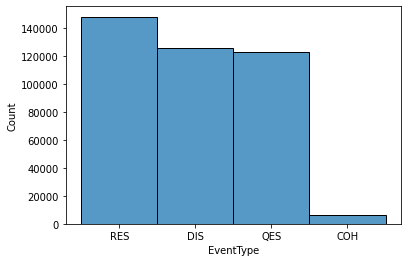

In [37]:
sns.histplot(df.EventType)

# Inital State

In [102]:
new_columns = {
    ('EvtNum', '', ''): 'EvtNum',
    ('EventType', '', ''): 'EventType',
    ('CCQEonHydrogen', '', ''): 'CCQEonHydrogen',
    ('InteractionTarget', '', ''): 'NuclearTarget',
    ('InitialStateMomenta', 'fP', 'fX'): 'Px',
    ('InitialStateMomenta', 'fP', 'fY'): 'Py',
    ('InitialStateMomenta', 'fP', 'fZ'): 'Pz',
    ('InitialStateMomenta', 'fE', ''): 'E',
}

InitialState = tree.arrays(['EvtNum',
                            'EventType',
                            'InteractionTarget',
                            'CCQEonHydrogen',
                            'InitialStateMomenta',
                            ], library='pd').rename(columns=new_columns)

InitialState["name"] = [item for sublist in tree.arrays(['InitialStateNames'], library='np')['InitialStateNames'] for item in sublist]

InitialState = InitialState.set_index(['EvtNum',
                                       'EventType',
                                       'NuclearTarget',
                                       'CCQEonHydrogen',
                                       'name'
                                        ], append=True).reorder_levels(['EvtNum',
                                                                        'entry',
                                                                        'EventType',
                                                                        'NuclearTarget', 
                                                                        'CCQEonHydrogen',
                                                                        'subentry',
                                                                        'name'
                                                                        ])

new_index = InitialState.index.to_frame()
new_index['subentry'] = new_index['subentry'].map(rimappa_subentry)
InitialState.index = pd.MultiIndex.from_frame(new_index)

InitialState['Ptot'] = np.sqrt(InitialState['Px']**2 + InitialState['Py']**2 + InitialState['Pz']**2)
InitialState

Px  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry       name                  
3      0      RES       C12           0              neutrino       nu_mu_bar  0.002342   
                                                     nucleon target proton    -0.127462   
4      1      DIS       C12           0              neutrino       nu_mu_bar  0.009199   
                                                     nucleon target proton     0.034926   
7      2      RES       C12           0              neutrino       nu_mu_bar -0.014603   
...                                                                                 ...   
986    402259 RES       Au197         0              neutrino       nu_mu_bar -0.006095   
                                                     nucleon target proton    -0.118548   
987    402260 RES       proton        0              neutrino       nu_mu_bar  0.008973   
                                                     nucleon target proton     0.000000   
997    402261 COH       C12           0              neutrino       nu_mu_bar -0.002330   

                                                                                     Py  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry       name                  
3      0      RES       C12           0              neutrino       nu_mu_bar -0.807463   
                                                     nucleon target proton    -0.067656   
4      1      DIS       C12           0              neutrino       nu_mu_bar -0.312431   
                                                     nucleon target proton    -0.058122   
7      2      RES       C12           0              neutrino       nu_mu_bar -0.327758   
...                                                                                 ...   
986    402259 RES       Au197         0              neutrino       nu_mu_bar -0.306166   
                                                     nucleon target proton     0.149098   
987    402260 RES       proton        0              neutrino       nu_mu_bar -0.408304   
                                                     nucleon target proton     0.000000   
997    402261 COH       C12           0              neutrino       nu_mu_bar -0.191651   

                                                                                     Pz  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry       name                  
3      0      RES       C12           0              neutrino       nu_mu_bar  7.850872   
                                                     nucleon target proton    -0.139947   
4      1      DIS       C12           0              neutrino       nu_mu_bar  3.058490   
                                                     nucleon target proton    -0.158514   
7      2      RES       C12           0              neutrino       nu_mu_bar  3.185989   
...                                                                                 ...   
986    402259 RES       Au197         0              neutrino       nu_mu_bar  2.951994   
                                                     nucleon target proton     0.064678   
987    402260 RES       proton        0              neutrino       nu_mu_bar  4.019679   
                                                     nucleon target proton     0.000000   
997    402261 COH       C12           0              neutrino       nu_mu_bar  1.857699   

                                                                                      E  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry       name                  
3      0      RES       C12           0              neutrino       nu_mu_bar  7.892287   
                                                     nucleon target proton     0.920345   
4      1      DIS       C12           0              neutrino       nu_mu_bar  3.074420   
                                                     nucleon target proton    

In [39]:
nucleon_target = InitialState.loc[(slice(None), slice(None), slice(None), slice(None), "nucleon target"),:]
incoming_neutrino = InitialState.loc[(slice(None), slice(None), slice(None), slice(None), "neutrino"),:]

In [40]:
InitialState_ccqe_H = InitialState.loc[(slice(None),slice(None),slice(None),1,slice(None)),:]
InitialState_ccqe_H

EvtNum  \
entry  EventType NuclearTarget CCQEonHydrogen subentry       name                
27     QES       proton        1              neutrino       nu_mu_bar      53   
                                              nucleon target proton         53   
69     QES       proton        1              neutrino       nu_mu_bar     152   
                                              nucleon target proton        152   
110    QES       proton        1              neutrino       nu_mu_bar     249   
...                                                                        ...   
402189 QES       proton        1              nucleon target proton        782   
402256 QES       proton        1              neutrino       nu_mu_bar     976   
                                              nucleon target proton        976   
402259 QES       proton        1              neutrino       nu_mu_bar     989   
                                              nucleon target proton        989   

                                                                              Px  \
entry  EventType NuclearTarget CCQEonHydrogen subentry       name                  
27     QES       proton        1              neutrino       nu_mu_bar  0.000961   
                                              nucleon target proton     0.000000   
69     QES       proton        1              neutrino       nu_mu_bar -0.002373   
                                              nucleon target proton     0.000000   
110    QES       proton        1              neutrino       nu_mu_bar -0.004538   
...                                                                          ...   
402189 QES       proton        1              nucleon target proton     0.000000   
402256 QES       proton        1              neutrino       nu_mu_bar -0.011527   
                                              nucleon target proton     0.000000   
402259 QES       proton        1              neutrino       nu_mu_bar  0.001063   
                                              nucleon target proton     0.000000   

                                                                              Py  \
entry  EventType NuclearTarget CCQEonHydrogen subentry       name                  
27     QES       proton        1              neutrino       nu_mu_bar -0.124413   
                                              nucleon target proton     0.000000   
69     QES       proton        1              neutrino       nu_mu_bar -0.294813   
                                              nucleon target proton     0.000000   
110    QES       proton        1              neutrino       nu_mu_bar -0.157301   
...                                                                          ...   
402189 QES       proton        1              nucleon target proton     0.000000   
402256 QES       proton        1              neutrino       nu_mu_bar -0.250647   
                                              nucleon target proton     0.000000   
402259 QES       proton        1              neutrino       nu_mu_bar -0.266992   
                                              nucleon target proton     0.000000   

                                                                              Pz  \
entry  EventType NuclearTarget CCQEonHydrogen subentry       name                  
27     QES       proton        1              neutrino       nu_mu_bar  1.275631   
                                              nucleon target proton     0.000000   
69     QES       proton        1              neutrino       nu_mu_bar  2.961925   
                                              nucleon target proton     0.000000   
110    QES       proton        1              neutrino       nu_mu_bar  1.495335   
...                                                                          ...   
402189 QES       proton        1              nucleon target proton     0.000000   
402256 QES       proton        1              neutrino       nu

# Primary Hadronic System

In [105]:
new_columns = {
    ('EvtNum', '', ''): 'EvtNum',
    ('EventType', '', ''): 'EventType',
    ('CCQEonHydrogen', '', ''): 'CCQEonHydrogen',
    ('InteractionTarget', '', ''): 'NuclearTarget',
    ('PrimaryStateHadronicSystemNames', '', ''): 'Names',
    ('PrimaryStateHadronicSystemMomenta', 'fP', 'fX'): 'Px',
    ('PrimaryStateHadronicSystemMomenta', 'fP', 'fY'): 'Py',
    ('PrimaryStateHadronicSystemMomenta', 'fP', 'fZ'): 'Pz',
    ('PrimaryStateHadronicSystemMomenta', 'fE', ''): 'E',
}

PrimaryStateHadronic = tree.arrays(['EvtNum',
                                    'EventType',
                                    'InteractionTarget',
                                    'CCQEonHydrogen',
                                    'PrimaryStateHadronicSystemMomenta',
                                    ], library='pd').rename(columns=new_columns)

PrimaryStateHadronic["name"] = [item for sublist in tree.arrays(['PrimaryStateHadronicSystemNames'], library='np')['PrimaryStateHadronicSystemNames'] for item in sublist]

PrimaryStateHadronic = PrimaryStateHadronic.set_index(['EvtNum',
                                                       'EventType',
                                                       'NuclearTarget',
                                                       'CCQEonHydrogen',
                                                       'name'
                                                      ], append=True).reorder_levels(['EvtNum',
                                                                                    'entry',
                                                                                   'EventType',
                                                                                   'NuclearTarget', 
                                                                                   'CCQEonHydrogen',
                                                                                   'subentry',
                                                                                   'name'
                                                                                   ])

PrimaryStateHadronic

Px  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        proton   0.685717   
                                                     1        pi-      0.277116   
4      1      DIS       C12           0              0        Lambda0 -0.828666   
                                                     1        K0       0.431616   
7      2      RES       C12           0              0        neutron  0.180256   
...                                                                         ...   
986    402259 RES       Au197         0              4        pi0      0.092665   
987    402260 RES       proton        0              0        neutron -0.104232   
                                                     1        pi0     -0.117681   
997    402261 COH       C12           0              0        C12      0.109948   
                                                     1        pi-     -0.166564   

                                                                             Py  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        proton   0.113380   
                                                     1        pi-      0.684744   
4      1      DIS       C12           0              0        Lambda0 -0.540720   
                                                     1        K0      -0.083337   
7      2      RES       C12           0              0        neutron  0.304461   
...                                                                         ...   
986    402259 RES       Au197         0              4        pi0      0.146393   
987    402260 RES       proton        0              0        neutron -0.593541   
                                                     1        pi0      0.098339   
997    402261 COH       C12           0              0        C12     -0.143123   
                                                     1        pi-     -0.104400   

                                                                             Pz  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        proton   0.924751   
                                                     1        pi-      1.729740   
4      1      DIS       C12           0              0        Lambda0  1.168860   
                                                     1        K0       0.864845   
7      2      RES       C12           0              0        neutron  0.465029   
...                                                                         ...   
986    402259 RES       Au197         0              4        pi0      0.226573   
987    402260 RES       proton        0              0        neutron  0.399386   
                                                     1        pi0      0.046822   
997    402261 COH       C12           0              0        C12      0.052876   
                                                     1        pi-      0.488950   

                                                                               E  
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        proton    1.489491  
                                                     1        pi-       1.886040  
4      1      DIS       C12           0              0        Lambda0   1.894740  
                                                     1        K0        1.090353  
7      2      RES       C12           0              0        neutron   1.106446  
...                                                                          ...  
986    402259 RES       Au197         0              4        pi0       0.315552  
987    402260 RES       proton        0              0        neutron   1.185516  
       

In [42]:
PrimaryStateHadronic_ccqe_H = PrimaryStateHadronic.loc[(slice(None),slice(None),slice(None),1,slice(None)),:]
PrimaryStateHadronic_ccqe_H

,,,,,,Px,Py,Pz,E
entry,EventType,NuclearTarget,CCQEonHydrogen,subentry,name,,,,
27,QES,proton,1,0,neutron,-0.307027,0.444991,0.471165,1.181974
69,QES,proton,1,0,neutron,0.019443,0.086032,0.017435,0.943857
110,QES,proton,1,0,neutron,0.657119,-0.264756,0.607200,1.324151
114,QES,proton,1,0,neutron,-0.428181,0.115122,0.171860,1.053048
124,QES,proton,1,0,neutron,0.350595,0.953616,1.348622,1.932321
...,...,...,...,...,...,...,...,...,...
402110,QES,proton,1,0,neutron,-0.056715,0.166796,0.042818,0.956898
402152,QES,proton,1,0,neutron,0.404107,-0.154706,0.144913,1.044519
402189,QES,proton,1,0,neutron,0.367051,0.175249,0.174201,1.038541


# Final State Lepton

In [43]:
new_columns = {
    ('EvtNum', '', ''): 'EvtNum',
    ('EventType', '', ''): 'EventType',
    ('CCQEonHydrogen', '', ''): 'CCQEonHydrogen',
    ('InteractionTarget', '', ''): 'NuclearTarget',
    ('FinalStateLeptonPDG', '', ''): 'PDG',
    ('FinalStateLeptonNames', '', ''): 'Name',
    ('InteractionTarget', '', ''): 'NuclearTarget',
    ('FinalStateLepton4Momentum', 'fP', 'fX'): 'Px',
    ('FinalStateLepton4Momentum', 'fP', 'fY'): 'Py',
    ('FinalStateLepton4Momentum', 'fP', 'fZ'): 'Pz',
    ('FinalStateLepton4Momentum', 'fE', ''): 'E',
}

# Estrazione dei dati dall'albero usando uproot
FinalStateLepton = tree.arrays(['EvtNum',
                                'EventType',
                                'InteractionTarget',
                                'CCQEonHydrogen',
                                'FinalStateLeptonPDG',
                                'FinalStateLeptonNames',
                                'FinalStateLepton4Momentum',
], library='pd')

# Appiattire il MultiIndex delle colonne del DataFrame
FinalStateLepton.columns = ['_'.join(filter(None, col)).strip() for col in FinalStateLepton.columns.values]

# Creare un dizionario di mappatura per le nuove colonne appiattite
flat_new_columns = {'_'.join(filter(None, k)).strip(): v for k, v in new_columns.items()}

# Rinomina le colonne usando il dizionario di mappatura
FinalStateLepton.rename(columns=flat_new_columns, inplace=True)

FinalStateLepton['Ptot'] = np.sqrt(FinalStateLepton['Px']**2 + FinalStateLepton['Py']**2 + FinalStateLepton['Pz']**2)

FinalStateLepton

,EvtNum,EventType,NuclearTarget,CCQEonHydrogen,PDG,Name,Px,Py,Pz,E,Ptot
0,3,RES,C12,0,-13,mu+,-1.087953,-1.673242,5.056433,5.437100,5.436074
1,4,DIS,C12,0,-13,mu+,0.441176,0.253504,0.866270,1.010192,1.004651
2,7,RES,C12,0,-13,mu+,-0.520522,-0.450201,2.235129,2.341066,2.338680
3,9,DIS,proton,0,-13,mu+,0.198971,0.066078,2.265041,2.277176,2.274723
4,10,DIS,C12,0,-13,mu+,0.356508,-0.157629,2.146449,2.184113,2.181556
...,...,...,...,...,...,...,...,...,...,...,...
402257,985,RES,C12,0,-13,mu+,-0.533506,-0.498101,2.434748,2.543992,2.541797
402258,987,RES,C12,0,-13,mu+,-0.437382,-0.033482,1.860117,1.914060,1.911141
402259,989,QES,proton,1,-13,mu+,-0.148403,-0.702940,2.375120,2.483648,2.481399
402260,997,RES,C12,0,-13,mu+,-0.269430,-0.931664,2.393279,2.584480,2.582320


In [44]:
FinalStateLepton_ccqe_H = FinalStateLepton[FinalStateLepton.CCQEonHydrogen==1]
FinalStateLepton_ccqe_H

,EvtNum,EventType,NuclearTarget,CCQEonHydrogen,PDG,Name,Px,Py,Pz,E,Ptot
27,53,QES,proton,1,-13,mu+,0.307988,-0.569404,0.804466,1.037982,1.032590
69,152,QES,proton,1,-13,mu+,-0.021817,-0.380845,2.944490,2.970977,2.969097
110,249,QES,proton,1,-13,mu+,-0.661657,0.107455,0.888135,1.117714,1.112708
114,262,QES,proton,1,-13,mu+,0.430376,-0.372996,2.354134,2.424348,2.422044
124,285,QES,proton,1,-13,mu+,-0.354270,-1.331718,2.368460,2.742215,2.740179
...,...,...,...,...,...,...,...,...,...,...,...
402110,580,QES,proton,1,-13,mu+,0.068788,-0.509270,3.263252,3.305158,3.303469
402152,705,QES,proton,1,-13,mu+,-0.396875,-0.040636,1.717151,1.766050,1.762886
402189,782,QES,proton,1,-13,mu+,-0.364797,-0.358054,1.592317,1.675684,1.672349
402256,976,QES,proton,1,-13,mu+,-0.095462,-0.243823,2.441408,2.457682,2.455410


# Final Hadronic System

Excluded from the system: \
    - particles with 0 momentum \
    - pseudo particles \
    - primary lepton \
    - e+ e- gamma coming from neutrino vertex, nuclear de-excitation 

In [106]:
new_columns = {
    ('EvtNum', '', ''): 'EvtNum',
    ('EventType', '', ''): 'EventType',
    ('CCQEonHydrogen', '', ''): 'CCQEonHydrogen',
    ('InteractionTarget', '', ''): 'NuclearTarget',
    ('FinalStateHadronicSystemNames', '', ''): 'Names',
    ('FinalStateHadronicSystemMomenta', 'fP', 'fX'): 'Px',
    ('FinalStateHadronicSystemMomenta', 'fP', 'fY'): 'Py',
    ('FinalStateHadronicSystemMomenta', 'fP', 'fZ'): 'Pz',
    ('FinalStateHadronicSystemMomenta', 'fE', ''): 'E',
}

FinalStateHadronic = tree.arrays(['EvtNum',
                                  'EventType',
                                  'InteractionTarget',
                                  'CCQEonHydrogen',
                                  'FinalStateHadronicSystemMomenta',
                                ], library='pd').rename(columns=new_columns)

FinalStateHadronic["name"] = [item for sublist in tree.arrays(['FinalStateHadronicSystemNames'], library='np')['FinalStateHadronicSystemNames'] for item in sublist]

FinalStateHadronic = FinalStateHadronic.set_index(['EvtNum',
                                                   'EventType',
                                                   'NuclearTarget',
                                                   'CCQEonHydrogen',
                                                   'name'
                                                   ], append=True).reorder_levels(['EvtNum',
                                                                                   'entry',
                                                                                   'EventType',
                                                                                   'NuclearTarget', 
                                                                                   'CCQEonHydrogen',
                                                                                   'subentry',
                                                                                   'name'
                                                                                   ])

FinalStateHadronic

Px  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        neutron  0.427845   
                                                     1        proton   0.140687   
                                                     2        neutron  0.558471   
                                                     3        pi-     -0.008677   
                                                     4        pi0     -0.417007   
...                                                                         ...   
986    402259 RES       Au197         0              4        pi0      0.092665   
987    402260 RES       proton        0              0        neutron -0.104232   
                                                     1        pi0     -0.117681   
997    402261 COH       C12           0              0        C12      0.109948   
                                                     1        pi-     -0.166564   

                                                                             Py  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        neutron -0.052836   
                                                     1        proton   0.200094   
                                                     2        neutron  0.172279   
                                                     3        pi-     -0.110111   
                                                     4        pi0      0.594465   
...                                                                         ...   
986    402259 RES       Au197         0              4        pi0      0.146393   
987    402260 RES       proton        0              0        neutron -0.593541   
                                                     1        pi0      0.098339   
997    402261 COH       C12           0              0        C12     -0.143123   
                                                     1        pi-     -0.104400   

                                                                             Pz  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        neutron  1.017962   
                                                     1        proton   0.040133   
                                                     2        neutron  0.547824   
                                                     3        pi-      0.252717   
                                                     4        pi0      1.075125   
...                                                                         ...   
986    402259 RES       Au197         0              4        pi0      0.226573   
987    402260 RES       proton        0              0        neutron  0.399386   
                                                     1        pi0      0.046822   
997    402261 COH       C12           0              0        C12      0.052876   
                                                     1        pi-      0.488950   

                                                                               E  
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        neutron   1.450818  
                                                     1        proton    0.970461  
                                                     2        neutron   1.234692  
                                                     3        pi-       0.309104  
                                                     4        pi0       1.304376  
...                                                                          ...  
986    402259 RES       Au197         0              4        pi0       0.315552  
987    402260 RES       proton        0              0        neutron   1.185516  
       

In [107]:
FinalStateHadronic["pdg"] = [item for sublist in tree.arrays(['FinalStateHadronicSystemPDG'], library='np')['FinalStateHadronicSystemPDG'] for item in sublist]
FinalStateHadronic["mass"] = FinalStateHadronic['pdg'].apply(get_mass_from_pdgid)
FinalStateHadronic["E_kin"] = FinalStateHadronic['E'] - FinalStateHadronic['mass']
FinalStateHadronic

Error occurred for PDG ID -12: unsupported operand type(s) for *: 'NoneType' and 'float'
Error occurred for PDG ID -12: unsupported operand type(s) for *: 'NoneType' and 'float'
Error occurred for PDG ID -12: unsupported operand type(s) for *: 'NoneType' and 'float'
Error occurred for PDG ID -12: unsupported operand type(s) for *: 'NoneType' and 'float'


Px  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        neutron  0.427845   
                                                     1        proton   0.140687   
                                                     2        neutron  0.558471   
                                                     3        pi-     -0.008677   
                                                     4        pi0     -0.417007   
...                                                                         ...   
986    402259 RES       Au197         0              4        pi0      0.092665   
987    402260 RES       proton        0              0        neutron -0.104232   
                                                     1        pi0     -0.117681   
997    402261 COH       C12           0              0        C12      0.109948   
                                                     1        pi-     -0.166564   

                                                                             Py  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        neutron -0.052836   
                                                     1        proton   0.200094   
                                                     2        neutron  0.172279   
                                                     3        pi-     -0.110111   
                                                     4        pi0      0.594465   
...                                                                         ...   
986    402259 RES       Au197         0              4        pi0      0.146393   
987    402260 RES       proton        0              0        neutron -0.593541   
                                                     1        pi0      0.098339   
997    402261 COH       C12           0              0        C12     -0.143123   
                                                     1        pi-     -0.104400   

                                                                             Pz  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                
3      0      RES       C12           0              0        neutron  1.017962   
                                                     1        proton   0.040133   
                                                     2        neutron  0.547824   
                                                     3        pi-      0.252717   
                                                     4        pi0      1.075125   
...                                                                         ...   
986    402259 RES       Au197         0              4        pi0      0.226573   
987    402260 RES       proton        0              0        neutron  0.399386   
                                                     1        pi0      0.046822   
997    402261 COH       C12           0              0        C12      0.052876   
                                                     1        pi-      0.488950   

                                                                               E  \
EvtNum entry  EventType NuclearTarget CCQEonHydrogen subentry name                 
3      0      RES       C12           0              0        neutron   1.450818   
                                                     1        proton    0.970461   
                                                     2        neutron   1.234692   
                                                     3        pi-       0.309104   
                                                     4        pi0       1.304376   
...                                                                          ...   
986    402259 RES       Au197         0              4        pi0       0.315552   
987    402260 RES       proton        0              0        neutron   1.185516 

In [47]:
FinalStateHadronic_CCQE_h = FinalStateHadronic.loc[(slice(None),slice(None),slice(None),1,slice(None)),:]
FinalStateHadronic_CCQE_h

,,,,,,Px,Py,Pz,E,pdg,mass,E_kin
entry,EventType,NuclearTarget,CCQEonHydrogen,subentry,name,,,,,,,
27,QES,proton,1,0,neutron,-0.307027,0.444991,0.471165,1.181974,2112,0.939565,0.242408
69,QES,proton,1,0,neutron,0.019443,0.086032,0.017435,0.943857,2112,0.939565,0.004292
110,QES,proton,1,0,neutron,0.657119,-0.264756,0.607200,1.324151,2112,0.939565,0.384586
114,QES,proton,1,0,neutron,-0.428181,0.115122,0.171860,1.053048,2112,0.939565,0.113483
124,QES,proton,1,0,neutron,0.350595,0.953616,1.348622,1.932321,2112,0.939565,0.992755
...,...,...,...,...,...,...,...,...,...,...,...,...
402110,QES,proton,1,0,neutron,-0.056715,0.166796,0.042818,0.956898,2112,0.939565,0.017333
402152,QES,proton,1,0,neutron,0.404107,-0.154706,0.144913,1.044519,2112,0.939565,0.104953
402189,QES,proton,1,0,neutron,0.367051,0.175249,0.174201,1.038541,2112,0.939565,0.098976


# Nuclear Remnants

In [48]:
new_columns = {
    ('CCQEonHydrogen', '', ''): 'CCQEonHydrogen',
    ('NuclearRemnantMomenta', 'fP', 'fX'): 'Px',
    ('NuclearRemnantMomenta', 'fP', 'fY'): 'Py',
    ('NuclearRemnantMomenta', 'fP', 'fZ'): 'Pz',
    ('NuclearRemnantMomenta', 'fE', ''): 'E',
}

NuclearRemnants = tree.arrays(['CCQEonHydrogen',
                               'NuclearRemnantMomenta',
                            ], library='pd').rename(columns=new_columns)

NuclearRemnants['Ptot'] = np.sqrt(NuclearRemnants['Px']**2 + NuclearRemnants['Py']**2 + NuclearRemnants['Pz']**2)

NuclearRemnants

,,CCQEonHydrogen,Px,Py,Pz,E,Ptot
entry,subentry,,,,,,
0,0,0,0.388978,0.061888,-0.139322,8.360598,0.417785
1,0,0,-0.034926,0.058122,0.158514,10.253997,0.172409
2,0,0,0.062215,-0.104443,-0.117220,10.253939,0.168877
4,0,0,0.375630,0.048569,-0.120772,9.220301,0.397545
5,0,0,-0.123155,-0.105543,0.142052,9.306496,0.215604
...,...,...,...,...,...,...,...
402255,0,0,0.047110,-0.413719,0.059910,7.471679,0.420680
402257,0,0,-0.348134,0.309859,0.241615,8.341691,0.524965
402258,0,0,-0.184375,0.059136,0.071586,7.416843,0.206436


In [49]:
NuclearRemnants[NuclearRemnants.CCQEonHydrogen==1]

,,CCQEonHydrogen,Px,Py,Pz,E,Ptot
entry,subentry,,,,,,


# Checks

1. Fiducial volume cut

Text(0.5, 0.98, '$\\overline{\\nu}_\\mu$ vertex position')

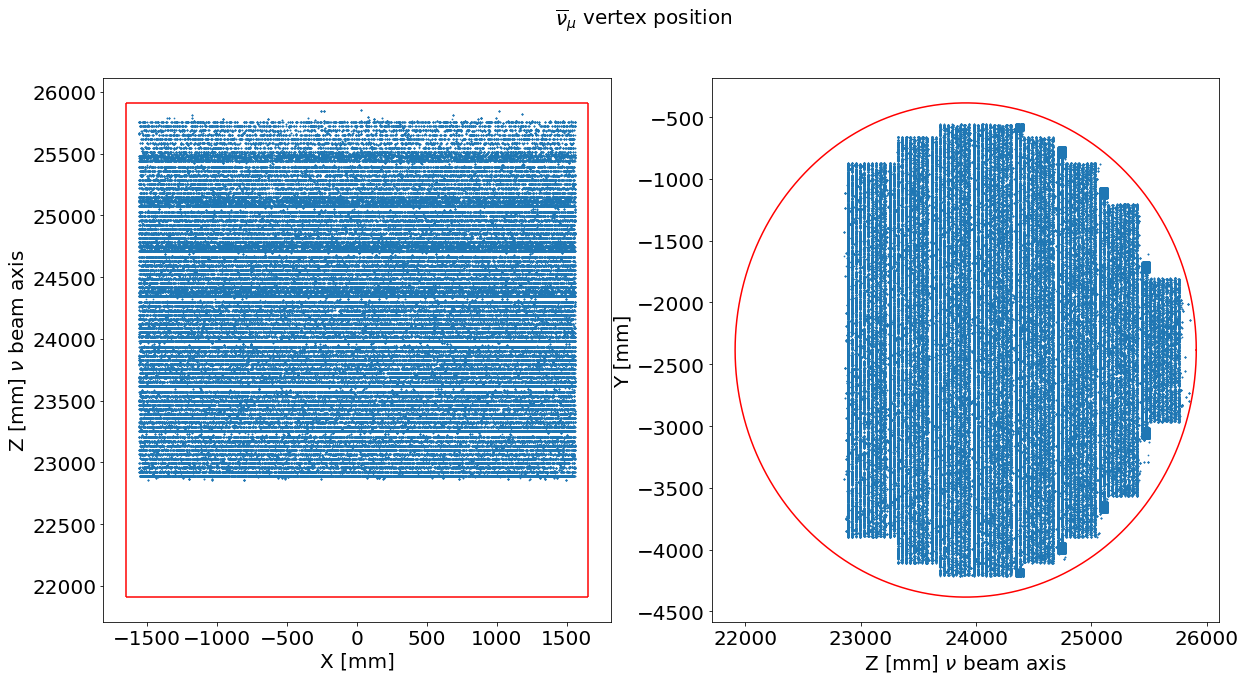

In [50]:
sand_center = [0, -2384.73, 23910]
sand_radius = 2000
theta = np.linspace(0, 2*np.pi, 100000)
z_sand = sand_center[2] + sand_radius * np.cos(theta)
y_sand = sand_center[1] + sand_radius * np.sin(theta)

fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].scatter(x = df["Interaction_vtxX"]*1e3, y = df["Interaction_vtxZ"]*1e3, s = 0.5)
ax[1].scatter(x = df["Interaction_vtxZ"]*1e3, y = df["Interaction_vtxY"]*1e3, s = 0.5)

ax[0].vlines(-1650, sand_center[2] - sand_radius, sand_center[2] + sand_radius, color='red', label='SAND')
ax[0].vlines(+1650, sand_center[2] - sand_radius, sand_center[2] + sand_radius, color='red')
ax[0].hlines(sand_center[2] - sand_radius, -1650, 1650, color='red')
ax[0].hlines(sand_center[2] + sand_radius, -1650, 1650, color='red')
ax[1].plot(z_sand, y_sand, linestyle='-', color='red', label = 'SAND')

ax[0].set_xlabel("X [mm]", fontsize=20)
ax[0].set_ylabel(r"Z [mm] $\nu$ beam axis", fontsize=20)
ax[0].tick_params(labelsize=20)
ax[1].set_xlabel(r"Z [mm] $\nu$ beam axis", fontsize=20)
ax[1].set_ylabel("Y [mm]", fontsize=20)
ax[1].tick_params(labelsize=20)

plt.suptitle(r"$\overline{\nu}_\mu$ vertex position", fontsize=20)

2. momentum conservation (do I really understand genie output)

In [51]:
df[["InitialState_Ptot","PrimaryState_Ptot","FinalState_Ptot"]]

,InitialState_Ptot,PrimaryState_Ptot,FinalState_Ptot
0,7.761433,7.761433,7.892287
1,2.923887,2.923887,3.074420
2,3.311640,3.311640,3.202837
3,3.803953,3.803953,3.803953
4,3.083030,3.083030,3.214442
...,...,...,...
402257,3.081554,3.081554,3.169497
402258,2.820653,2.820653,2.905948
402259,2.616336,2.616336,2.616336
402260,3.582800,3.582800,3.775680


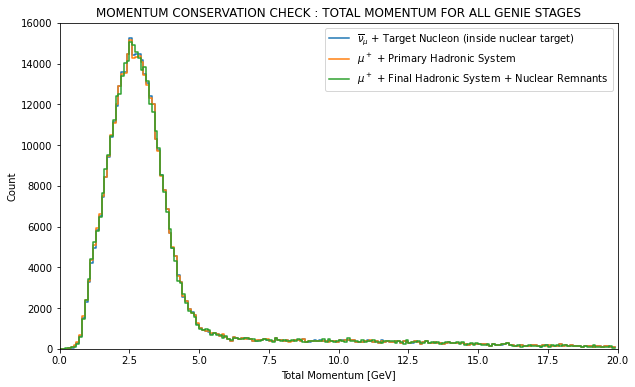

In [52]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.histplot(data=df, x='InitialState_Ptot', bins=np.arange(0,20,0.1), label=r'$\overline{\nu}_\mu$ + Target Nucleon (inside nuclear target)', ax=ax, element='step', fill=False)
sns.histplot(data=df, x='PrimaryState_Ptot', bins=np.arange(0,20,0.1),label=r'$\mu^+$ + Primary Hadronic System', ax=ax, element='step', fill=False)
sns.histplot(data=df, x='FinalState_Ptot', bins=np.arange(0,20,0.1), label=r'$\mu^+$ + Final Hadronic System + Nuclear Remnants', ax=ax, element='step', fill=False)


plt.title("MOMENTUM CONSERVATION CHECK : TOTAL MOMENTUM FOR ALL GENIE STAGES")
plt.xlabel("Total Momentum [GeV]")
plt.xlim([0,20])
plt.legend()

All CCQE on Hydrogen are expected to have:
- target: proton 
- primary hadronic system = final hadronic system = 1 neutron 

Text(0.5, 0.98, 'CCQE events on H')

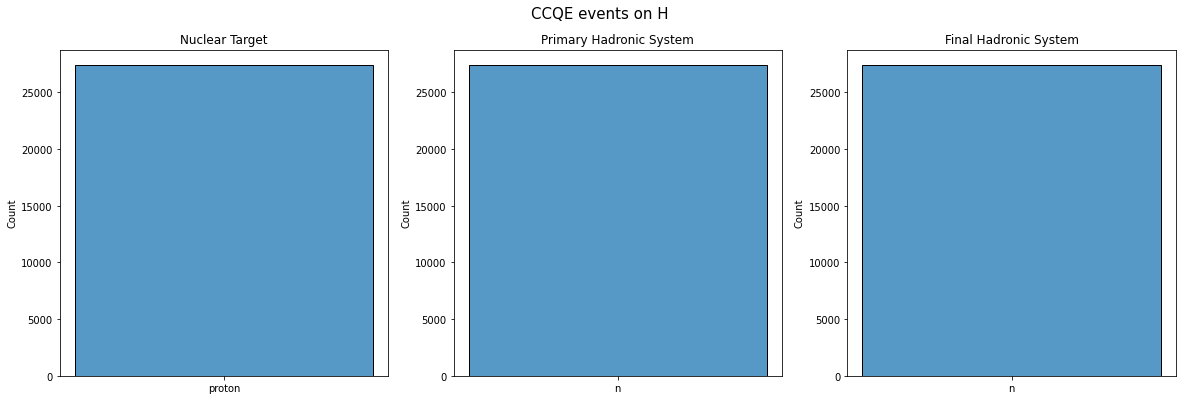

In [53]:
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.histplot(df[df['CCQEonHydrogen']==1].NuclearTarget, ax=ax[0])
sns.histplot(df[df['CCQEonHydrogen']==1].PrimaryStateHadronicSystemTopology_name, ax=ax[1])
sns.histplot(df[df['CCQEonHydrogen']==1].FinalStateHadronicSystemTopology_name, ax=ax[2])

ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[2].set_xlabel("")

ax[0].set_title("Nuclear Target")
ax[1].set_title("Primary Hadronic System")
ax[2].set_title("Final Hadronic System")

plt.suptitle("CCQE events on H", fontsize=15)

Expected statistics of events in C and C3H6: does it scale with the mass of the targets?

In [54]:
df.groupby(['InteractionTargetFromGEO']).size()

InteractionTargetFromGEO
Air35C         213
C3H6        300156
Gold          6292
Graphite     84094
Mylar         7902
driftGas      3605
dtype: int64

In [55]:
300156/84094

3.5692915071229816

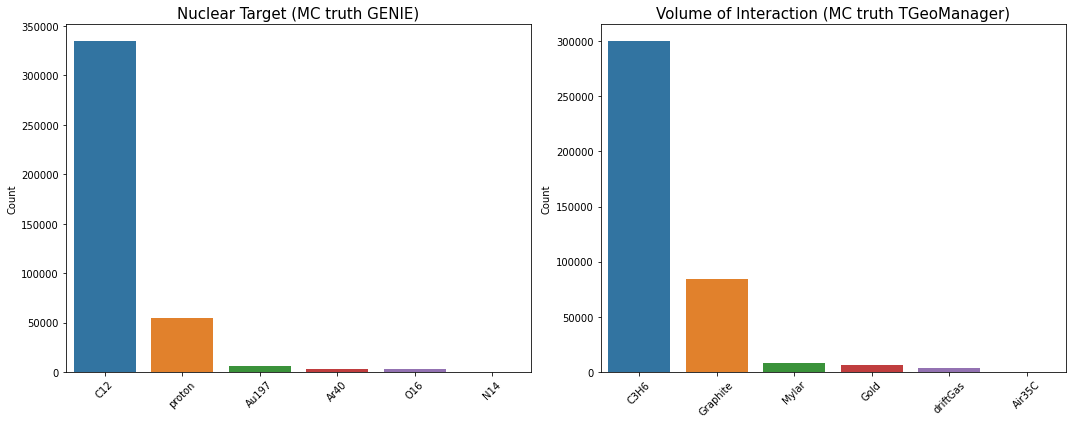

In [56]:
interaction_target_counts = df['NuclearTarget'].value_counts().sort_values(ascending=False)
interaction_target_geo_counts = df['InteractionTargetFromGEO'].value_counts().sort_values(ascending=False)

# Crea un nuovo DataFrame ordinato per il grafico
df_sorted_interaction_target = interaction_target_counts.reset_index()
df_sorted_interaction_target.columns = ['InteractionTarget', 'Count']

df_sorted_interaction_target_geo = interaction_target_geo_counts.reset_index()
df_sorted_interaction_target_geo.columns = ['InteractionTargetFromGEO', 'Count']

# Grafica gli istogrammi ordinati
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='InteractionTarget', y='Count', data=df_sorted_interaction_target, ax=ax[0])
ax[0].set_title('Nuclear Target (MC truth GENIE)', fontsize=15)
ax[0].set_xlabel('')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(x='InteractionTargetFromGEO', y='Count', data=df_sorted_interaction_target_geo, ax=ax[1])
ax[1].set_title('Volume of Interaction (MC truth TGeoManager)', fontsize=15)
ax[1].set_xlabel('')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Topology

In [57]:
df

,EvtNum,NuclearTarget,InteractionTargetFromGEO,EventType,CCQEonHydrogen,InteractionVolume,Interaction_vtxX,Interaction_vtxY,Interaction_vtxZ,InitialState_Px,...,PrimaryState_Pz,PrimaryState_E,FinalState_Px,FinalState_Py,FinalState_Pz,FinalState_E,Nucleo_target,InitialState_Ptot,PrimaryState_Ptot,FinalState_Ptot
0,3,C12,Graphite,RES,0,CTarget_B,0.543455,-3.210264,24.348786,-0.125120,...,7.710924,8.812631,0.002342,-0.807463,7.850872,19.067150,proton,7.761433,7.761433,7.892287
1,4,C12,C3H6,DIS,0,C3H6Target_A,1.383373,-2.739792,24.263772,0.044125,...,2.899975,3.995286,0.009199,-0.312431,3.058490,14.249283,proton,2.923887,2.923887,3.074420
2,7,C12,Graphite,RES,0,CTarget_B,-1.395769,-3.751119,24.349695,-0.076818,...,3.303209,4.123761,-0.014603,-0.327758,3.185989,14.377700,proton,3.311640,3.311640,3.202837
3,9,proton,C3H6,DIS,0,C3H6Target_B,-0.475896,-4.051112,24.593424,-0.007777,...,3.783350,4.742225,-0.007777,-0.395293,3.783350,4.742225,proton,3.803953,3.803953,3.803953
4,10,C12,C3H6,DIS,0,C3H6Target_C,0.708860,-1.763741,23.133073,-0.019918,...,3.060436,4.134228,0.004023,-0.325031,3.197965,14.389305,neutron,3.083030,3.083030,3.214442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402257,985,C12,C3H6,RES,0,C3H6Target_X0,0.047913,-2.536368,25.514196,0.134473,...,3.061178,4.089043,0.000055,-0.319818,3.153320,14.344360,neutron,3.081554,3.081554,3.169497
402258,987,C12,Graphite,RES,0,CTarget_A,1.132028,-2.022161,23.617995,0.085079,...,2.789576,3.825314,0.010515,-0.288972,2.891526,14.080812,neutron,2.820653,2.820653,2.905948
402259,989,proton,C3H6,QES,1,C3H6Target_B,0.226698,-3.167994,23.570622,0.001063,...,2.602677,3.554608,0.001063,-0.266992,2.602677,3.554608,proton,2.616336,2.616336,2.616336
402260,997,C12,C3H6,RES,0,C3H6Target_A,0.723890,-3.676851,24.088808,0.065775,...,3.565613,4.694502,0.006578,-0.386193,3.755871,14.950543,neutron,3.582800,3.582800,3.775680


In [58]:
df.columns

Index(['EvtNum', 'NuclearTarget', 'InteractionTargetFromGEO', 'EventType',
       'CCQEonHydrogen', 'InteractionVolume', 'Interaction_vtxX',
       'Interaction_vtxY', 'Interaction_vtxZ', 'InitialState_Px',
       'InitialState_Py', 'InitialState_Pz', 'InitialState_E',
       'PrimaryHadronic_Px', 'PrimaryHadronic_Py', 'PrimaryHadronic_Pz',
       'PrimaryHadronic_E', 'FinalHadronic_Px', 'FinalHadronic_Py',
       'FinalHadronic_Pz', 'FinalHadronic_E', 'NuclearRemnant_Px',
       'NuclearRemnant_Py', 'NuclearRemnant_Pz', 'NuclearRemnant_E',
       'PrimaryStateHadronicSystemTopology_name',
       'FinalStateHadronicSystemTopology_name', 'PrimaryState_Px',
       'PrimaryState_Py', 'PrimaryState_Pz', 'PrimaryState_E', 'FinalState_Px',
       'FinalState_Py', 'FinalState_Pz', 'FinalState_E', 'Nucleo_target',
       'InitialState_Ptot', 'PrimaryState_Ptot', 'FinalState_Ptot'],
      dtype='object')

In [59]:
order = ["n", "p", 'n + pi+', 'n + pi-', 'n + pi0', 'p + pi+', 'p + pi-', 'p + pi0', 'no particles', 'Other']

In [60]:
PrimaryStateHadronic

Px  \
entry  EventType NuclearTarget CCQEonHydrogen subentry name                
0      RES       C12           0              0        proton   0.685717   
                                              1        pi-      0.277116   
1      DIS       C12           0              0        Lambda0 -0.828666   
                                              1        K0       0.431616   
2      RES       C12           0              0        neutron  0.180256   
...                                                                  ...   
402260 RES       C12           0              0        pi-     -0.113516   
                                              1        neutron  0.298693   
                                              2        pi0      0.150027   
402261 RES       C12           0              0        neutron  0.413829   
                                              1        pi0     -0.444046   

                                                                      Py  \
entry  EventType NuclearTarget CCQEonHydrogen subentry name                
0      RES       C12           0              0        proton   0.113380   
                                              1        pi-      0.684744   
1      DIS       C12           0              0        Lambda0 -0.540720   
                                              1        K0      -0.083337   
2      RES       C12           0              0        neutron  0.304461   
...                                                                  ...   
402260 RES       C12           0              0        pi-     -0.128029   
                                              1        neutron  0.488519   
                                              2        pi0      0.226892   
402261 RES       C12           0              0        neutron -0.012214   
                                              1        pi0     -0.009883   

                                                                      Pz  \
entry  EventType NuclearTarget CCQEonHydrogen subentry name                
0      RES       C12           0              0        proton   0.924751   
                                              1        pi-      1.729740   
1      DIS       C12           0              0        Lambda0  1.168860   
                                              1        K0       0.864845   
2      RES       C12           0              0        neutron  0.465029   
...                                                                  ...   
402260 RES       C12           0              0        pi-      0.017793   
                                              1        neutron  0.592529   
                                              2        pi0      0.562012   
402261 RES       C12           0              0        neutron  0.348191   
                                              1        pi0      0.242056   

                                                                       E  
entry  EventType NuclearTarget CCQEonHydrogen subentry name               
0      RES       C12           0              0        proton   1.489491  
                                              1        pi-      1.886040  
1      DIS       C12           0              0        Lambda0  1.894740  
                                              1        K0       1.090353  
2      RES       C12           0              0        neutron  1.106446  
...                                                                  ...  
402260 RES       C12           0              0        pi-      0.221526  
                                              1        neutron  1.249697  
                                              2        pi0      0.638799  
402261 RES       C12           0              0        neutron  1.084170  
                                              1        pi0      0.523531  

[836548 rows x 4 columns]

Text(0.5, 1.0, 'GENIE $\\overline{\\nu}_\\mu$ CC Primary Hadronic System')

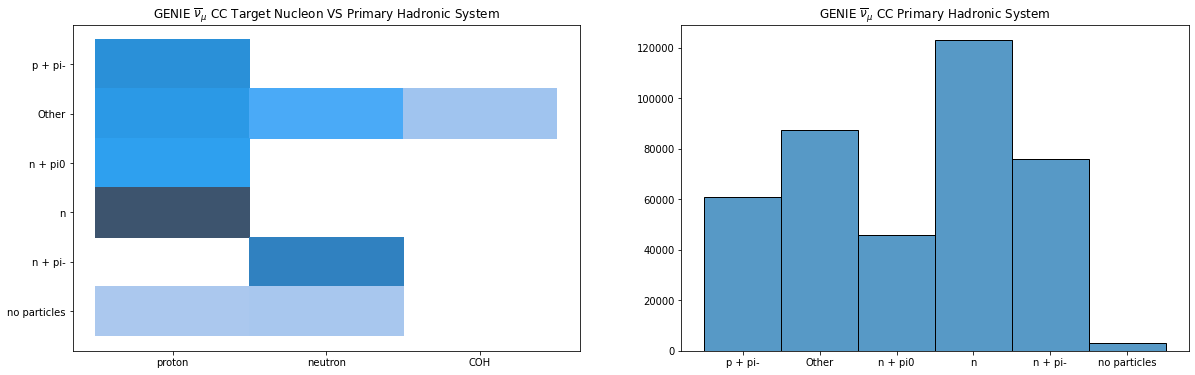

In [61]:
fig, ax = plt.subplots(1,2,figsize=(20,6))

sns.histplot(data=df, x = 'Nucleo_target', y = 'PrimaryStateHadronicSystemTopology_name', ax=ax[0])
sns.histplot(data=df[df.EventType!='COH'], x = 'PrimaryStateHadronicSystemTopology_name', ax=ax[1])

ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title(r'GENIE $\overline{\nu}_\mu$ CC Target Nucleon VS Primary Hadronic System')

ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title(r'GENIE $\overline{\nu}_\mu$ CC Primary Hadronic System')

<AxesSubplot:xlabel='FinalStateHadronicSystemTopology_name', ylabel='Count'>

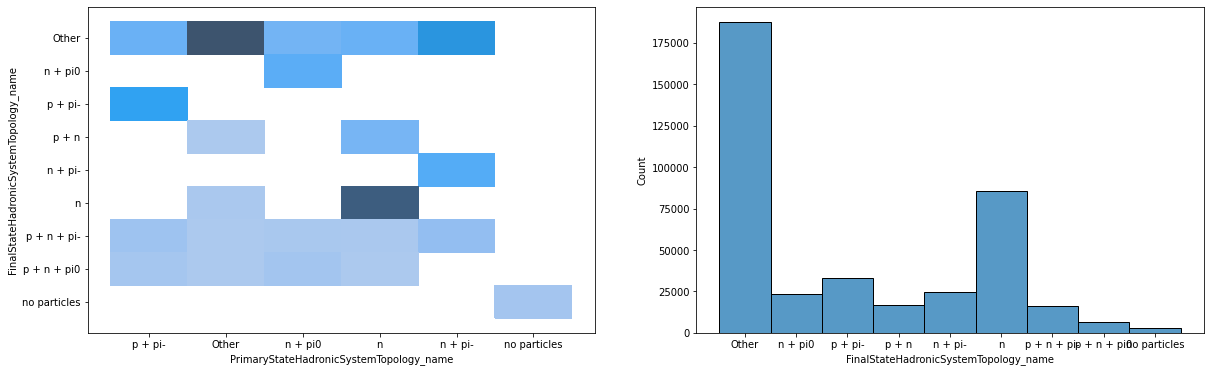

In [62]:
fig, ax = plt.subplots(1,2,figsize=(20,6))

sns.histplot(data=df, x = 'PrimaryStateHadronicSystemTopology_name', y = 'FinalStateHadronicSystemTopology_name', ax=ax[0])
sns.histplot(data=df[df.EventType!='COH'], x = 'FinalStateHadronicSystemTopology_name', ax=ax[1])

# Kinematics

In [63]:
nucleon_target

,,,,,,EvtNum,Px,Py,Pz,E,Ptot
entry,EventType,NuclearTarget,CCQEonHydrogen,subentry,name,,,,,,
0,RES,C12,0,nucleon target,proton,3,-0.127462,-0.067656,-0.139947,0.920345,0.201020
1,DIS,C12,0,nucleon target,proton,4,0.034926,-0.058122,-0.158514,0.920866,0.172409
2,RES,C12,0,nucleon target,proton,7,-0.062215,0.104443,0.117220,0.920924,0.168877
3,DIS,proton,0,nucleon target,proton,9,0.000000,0.000000,0.000000,0.938272,0.000000
4,DIS,C12,0,nucleon target,neutron,10,-0.023941,-0.047008,-0.137529,0.919786,0.147300
...,...,...,...,...,...,...,...,...,...,...,...
402257,RES,C12,0,nucleon target,neutron,985,0.134418,-0.007413,-0.092142,0.919546,0.163136
402258,RES,C12,0,nucleon target,neutron,987,0.074563,-0.119821,-0.101950,0.919366,0.174099
402259,QES,proton,1,nucleon target,proton,989,0.000000,0.000000,0.000000,0.938272,0.000000


Text(0.5, 1.0, 'Nucleon initial Energy')

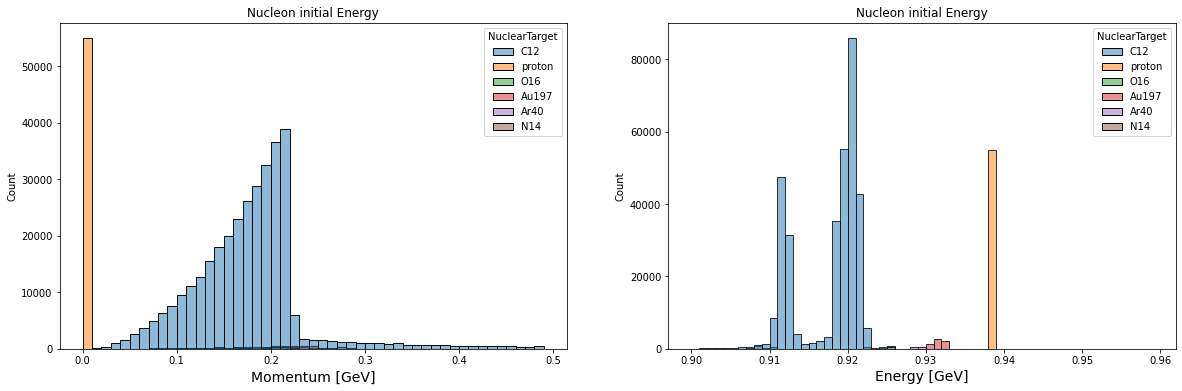

In [64]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.histplot(data=nucleon_target, x='Ptot', hue='NuclearTarget', ax = ax[0],  bins = np.arange(0,0.5,0.01))
sns.histplot(data=nucleon_target, x='E', hue='NuclearTarget', ax = ax[1], bins = np.arange(0.9,0.96,0.001))

ax[0].set_xlabel("Momentum [GeV]", fontsize=14)
ax[0].set_title("Nucleon initial Energy")

ax[1].set_xlabel("Energy [GeV]", fontsize=14)
ax[1].set_title("Nucleon initial Energy")

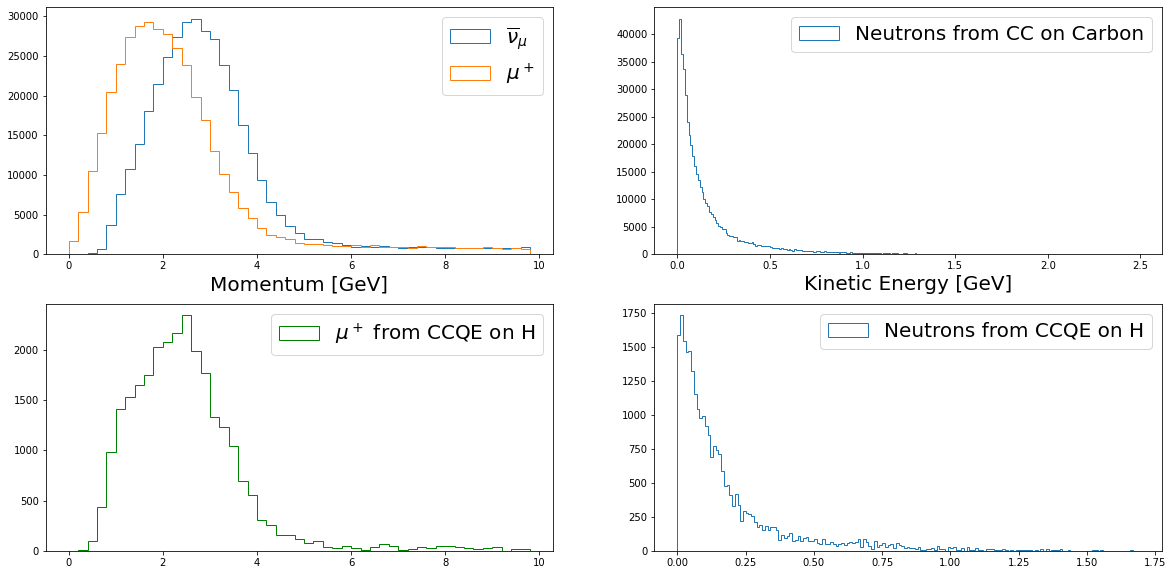

In [199]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

ax[0,0].hist(x = incoming_neutrino['Ptot'], 
             bins = np.arange(0,10,0.2), histtype='step', label = r'$\overline{\nu}_\mu$')

ax[0,0].hist(x = FinalStateLepton['Ptot'], 
             bins = np.arange(0,10,0.2), histtype='step', label = r'$\mu^+$')

ax[0,1].hist(x = FinalStateHadronic.loc[(slice(None),slice(None),slice(None),"C12",slice(None),slice(None),'neutron'),:]['E_kin'].values,
             bins=np.arange(0,2.5,0.01), histtype='step', label = "Neutrons from CC on Carbon")

ax[1,0].hist(x = FinalStateLepton[FinalStateLepton.CCQEonHydrogen==1]['Ptot'], 
             bins = np.arange(0,10,0.2), histtype='step', color = 'green', label = r'$\mu^+$ from CCQE on H')

ax[1,1].hist(x = FinalStateHadronic.loc[(slice(None),slice(None),slice(None),slice(None),1,slice(None),'neutron'),:]['E_kin'].values,
            bins=np.arange(0,1.7,0.01), histtype='step', label = "Neutrons from CCQE on H")

ax[0,0].set_xlabel("Momentum [GeV]", fontsize=20)
ax[0,0].legend(fontsize=20)

ax[0,1].set_xlabel("Kinetic Energy [GeV]", fontsize=20)
ax[0,1].legend(fontsize=20)

ax[1,0].legend(fontsize=20)

ax[1,1].legend(fontsize=20)

In [168]:
FinalStateHadronic.loc[(slice(None),slice(None),slice(None),slice(None),1,slice(None),'neutron'),:]['E_kin']

EvtNum  entry   EventType  NuclearTarget  CCQEonHydrogen  subentry  name   
53      27      QES        proton         1               0         neutron    0.242408
152     69      QES        proton         1               0         neutron    0.004292
249     110     QES        proton         1               0         neutron    0.384586
262     114     QES        proton         1               0         neutron    0.113483
285     124     QES        proton         1               0         neutron    0.992755
                                                                                 ...   
626     402125  QES        proton         1               0         neutron    0.667018
676     402141  QES        proton         1               0         neutron    0.023561
805     402193  QES        proton         1               0         neutron    0.009044
884     402215  QES        proton         1               0         neutron    0.277536
934     402237  QES        proton         1 

In [160]:
FinalStateLepton

,EvtNum,EventType,NuclearTarget,CCQEonHydrogen,PDG,Name,Px,Py,Pz,E,Ptot,Fraction_Enu
0,3,RES,C12,0,-13,mu+,-1.087953,-1.673242,5.056433,5.437100,5.436074,0.688913
1,4,DIS,C12,0,-13,mu+,0.441176,0.253504,0.866270,1.010192,1.004651,0.328580
2,7,RES,C12,0,-13,mu+,-0.520522,-0.450201,2.235129,2.341066,2.338680,0.730935
3,9,DIS,proton,0,-13,mu+,0.198971,0.066078,2.265041,2.277176,2.274723,0.598634
4,10,DIS,C12,0,-13,mu+,0.356508,-0.157629,2.146449,2.184113,2.181556,0.679469
...,...,...,...,...,...,...,...,...,...,...,...,...
402257,985,RES,C12,0,-13,mu+,-0.533506,-0.498101,2.434748,2.543992,2.541797,0.802648
402258,987,RES,C12,0,-13,mu+,-0.437382,-0.033482,1.860117,1.914060,1.911141,0.658669
402259,989,QES,proton,1,-13,mu+,-0.148403,-0.702940,2.375120,2.483648,2.481399,0.949285
402260,997,RES,C12,0,-13,mu+,-0.269430,-0.931664,2.393279,2.584480,2.582320,0.684507


(array([3.97872e+05, 3.60300e+03, 5.86000e+02, 1.25000e+02, 4.90000e+01,
        1.40000e+01, 9.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([1.27882741e-02, 4.37677590e+00, 8.74076352e+00, 1.31047511e+01,
        1.74687388e+01, 2.18327264e+01, 2.61967140e+01, 3.05607016e+01,
        3.49246893e+01, 3.92886769e+01, 4.36526645e+01]),
 <BarContainer object of 10 artists>)

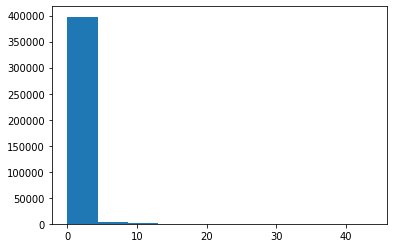

In [128]:
plt.hist(df['FinalHadronic_KinE'].values / incoming_neutrino['E'].values + FinalStateLepton['E'].values / incoming_neutrino['E'].values)

In [149]:
np.sum((df[df.CCQEonHydrogen==1]['FinalHadronic_KinE'].values / incoming_neutrino.loc[(slice(None), slice(None), slice(None), 1, slice(None), slice(None)),:]['E'].values)>1)

45

In [144]:
FinalStateHadronic.loc[(slice(None), slice(None),slice(None), slice(None), 1, slice(None), slice(None)),:]

,,,,,,,Px,Py,Pz,E,pdg,mass,E_kin
EvtNum,entry,EventType,NuclearTarget,CCQEonHydrogen,subentry,name,,,,,,,
53,27,QES,proton,1,0,neutron,-0.307027,0.444991,0.471165,1.181974,2112,0.939565,0.242408
152,69,QES,proton,1,0,neutron,0.019443,0.086032,0.017435,0.943857,2112,0.939565,0.004292
249,110,QES,proton,1,0,neutron,0.657119,-0.264756,0.607200,1.324151,2112,0.939565,0.384586
262,114,QES,proton,1,0,neutron,-0.428181,0.115122,0.171860,1.053048,2112,0.939565,0.113483
285,124,QES,proton,1,0,neutron,0.350595,0.953616,1.348622,1.932321,2112,0.939565,0.992755
...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,402125,QES,proton,1,0,neutron,-0.825482,0.170375,0.993921,1.606583,2112,0.939565,0.667018
676,402141,QES,proton,1,0,neutron,-0.080677,-0.195060,0.016482,0.963126,2112,0.939565,0.023561
805,402193,QES,proton,1,0,neutron,-0.102738,-0.080104,0.010210,0.948609,2112,0.939565,0.009044


In [139]:
incoming_neutrino.loc[(slice(None), slice(None), slice(None), 1, slice(None), slice(None)),:]['E'].values

array([1.28168388, 2.97656202, 1.50359264, ..., 1.77595265, 2.46278066,
       2.616336  ])

In [66]:
FinalStateLepton['Fraction_Enu'] = FinalStateLepton['E'].values / incoming_neutrino['E'].values
FinalStateLepton

,EvtNum,EventType,NuclearTarget,CCQEonHydrogen,PDG,Name,Px,Py,Pz,E,Ptot,Fraction_Enu
0,3,RES,C12,0,-13,mu+,-1.087953,-1.673242,5.056433,5.437100,5.436074,0.688913
1,4,DIS,C12,0,-13,mu+,0.441176,0.253504,0.866270,1.010192,1.004651,0.328580
2,7,RES,C12,0,-13,mu+,-0.520522,-0.450201,2.235129,2.341066,2.338680,0.730935
3,9,DIS,proton,0,-13,mu+,0.198971,0.066078,2.265041,2.277176,2.274723,0.598634
4,10,DIS,C12,0,-13,mu+,0.356508,-0.157629,2.146449,2.184113,2.181556,0.679469
...,...,...,...,...,...,...,...,...,...,...,...,...
402257,985,RES,C12,0,-13,mu+,-0.533506,-0.498101,2.434748,2.543992,2.541797,0.802648
402258,987,RES,C12,0,-13,mu+,-0.437382,-0.033482,1.860117,1.914060,1.911141,0.658669
402259,989,QES,proton,1,-13,mu+,-0.148403,-0.702940,2.375120,2.483648,2.481399,0.949285
402260,997,RES,C12,0,-13,mu+,-0.269430,-0.931664,2.393279,2.584480,2.582320,0.684507


<AxesSubplot:xlabel='Fraction_Enu', ylabel='Count'>

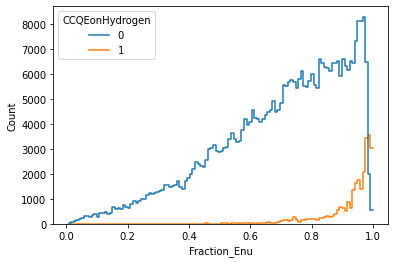

In [67]:
sns.histplot(data= FinalStateLepton, x='Fraction_Enu', hue='CCQEonHydrogen', fill=False, element='step')

<AxesSubplot:xlabel='Fraction_Enu', ylabel='Count'>

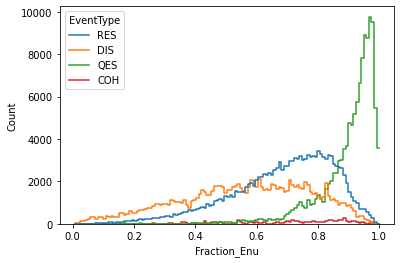

In [68]:
sns.histplot(data= FinalStateLepton, x='Fraction_Enu', hue='EventType', fill=False, element='step')

In [71]:
incoming_neutrino['E'].values

array([7.89228667, 3.07441999, 3.202837  , ..., 2.616336  , 3.77567961,
       3.17034517])

TESTS

In [76]:

test = tree.arrays([
 'EvtNum',
 'InteractionTarget',
 'InteractionTargetFromGEO',
 'EventType',
 'CCQEonHydrogen',
 'FinalStateLeptonTransverseP',
 'FinalStateHadronicSystemTransverseP',
 'MissingTransverseMomentum',
 'RmH',
 'DoubleTransverseMomentumImbalance',
 ],library='pd')

# test['FinalStateTransversePtot'] = np.sqrt(test['FinalStateTransversePfX']**2+test['FinalStateTransversePfY']**2+test['FinalStateTransversePfZ']**2)
test

,EvtNum,InteractionTarget,InteractionTargetFromGEO,EventType,CCQEonHydrogen,FinalStateLeptonTransversePfX,FinalStateLeptonTransversePfY,FinalStateLeptonTransversePfZ,FinalStateHadronicSystemTransversePfX,FinalStateHadronicSystemTransversePfY,FinalStateHadronicSystemTransversePfZ,MissingTransverseMomentum,RmH,DoubleTransverseMomentumImbalance
0,3,C12,Graphite,RES,0,-1.089497,-1.141150,-0.117042,0.700476,1.094077,0.112317,3.918866e-01,-0.537825,-2.494945e-01
1,4,C12,C3H6,DIS,0,0.438670,0.338597,0.033269,-0.403290,-0.412133,-0.040887,8.195927e-02,-0.751651,-8.010154e-02
2,7,C12,Graphite,RES,0,-0.510164,-0.217718,-0.024736,0.448434,0.333028,0.036316,1.313059e-01,-0.619984,-1.308453e-01
3,9,proton,C3H6,DIS,0,0.203561,0.299422,0.031703,-0.203561,-0.299422,-0.031703,7.149393e-09,-1.000000,-5.551115e-17
4,10,C12,C3H6,DIS,0,0.353814,0.059955,0.005649,-0.729600,-0.095926,-0.008832,3.775166e-01,-0.321897,2.745618e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402257,979,proton,C3H6,RES,0,0.165514,-0.287180,-0.028794,-0.165514,0.287180,0.028794,1.824755e-09,-1.000000,1.227246e-09
402258,982,C12,C3H6,DIS,0,0.517965,0.123936,0.013436,-0.431318,-0.142242,-0.015110,8.857485e-02,-0.673754,-3.814578e-02
402259,986,Au197,Gold,RES,0,-0.358621,0.389272,0.039633,0.321164,-0.271721,-0.027518,1.239687e-01,-0.545532,-5.223274e-02
402260,987,proton,C3H6,RES,0,0.223009,0.445333,0.044737,-0.223009,-0.445333,-0.044737,1.110223e-16,-1.000000,5.551115e-17


Text(0.5, 0, '[GeV]')

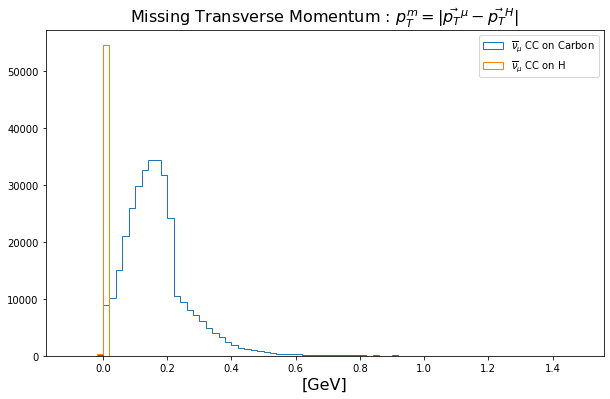

In [93]:
fig, ax = plt.subplots(figsize=(10, 6))

# plt.hist(x=test['RmH'], bins=np.arange(-1.1,1.1,0.02), histtype='step', label = "All")
plt.hist(x=test[test.InteractionTarget=='C12']['MissingTransverseMomentum'], bins=np.arange(-0.1,1.5,0.02), histtype='step', label=r'$\overline{\nu}_\mu$ CC on Carbon')
plt.hist(x=test[test.InteractionTarget=='proton']['MissingTransverseMomentum'], bins=np.arange(-0.1,1.5,0.02), histtype='step', label=r'$\overline{\nu}_\mu$ CC on H')
# plt.hist(x=test[test.CCQEonHydrogen==1]['MissingTransverseMomentum'], bins=np.arange(-0.1,1.5,0.02), histtype='step', label=r'$\overline{\nu}_\mu$ CCQE on H')
plt.legend()

plt.title(r"Missing Transverse Momentum : $p_T^m = |\vec{p_T}^\mu - \vec{p_T}^H|$", fontsize=16)
plt.xlabel("[GeV]", fontsize=16)

Text(0.5, 0, '$R_{mH}$')

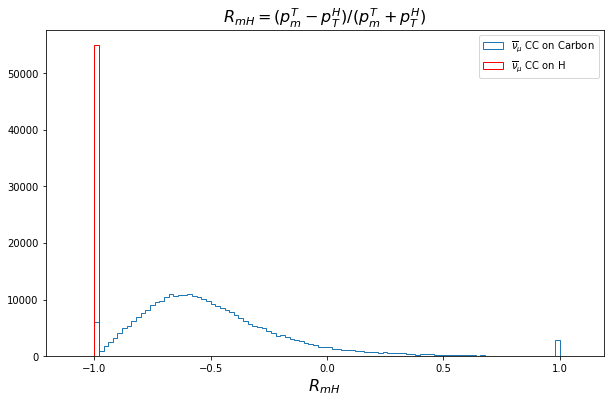

In [95]:
fig, ax = plt.subplots(figsize=(10, 6))

# plt.hist(x=test['RmH'], bins=np.arange(-1.1,1.1,0.02), histtype='step', label = "All")
plt.hist(x=test[test.InteractionTarget=='C12']['RmH'], bins=np.arange(-1.1,1.1,0.02), histtype='step', label=r'$\overline{\nu}_\mu$ CC on Carbon')
plt.hist(x=test[test.InteractionTarget=='proton']['RmH'], bins=np.arange(-1.1,1.1,0.02), color='red', histtype='step', label=r'$\overline{\nu}_\mu$ CC on H')
plt.legend()

plt.title(r"$R_{mH}=(p_m^T - p_T^H)/(p_m^T + p_T^H)$", fontsize=16)
plt.xlabel(r"$R_{mH}$", fontsize=16)

Text(0.5, 0, '$\\delta p_{TT}$ [Gev]')

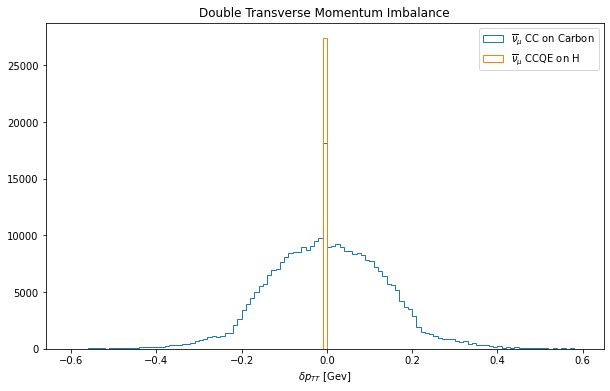

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.hist(x = test[test.InteractionTarget=='C12']['DoubleTransverseMomentumImbalance'], bins=np.arange(-0.6, 0.6, 0.01), histtype='step', label=r'$\overline{\nu}_\mu$ CC on Carbon')
plt.hist(x = test[test.CCQEonHydrogen==1]['DoubleTransverseMomentumImbalance'], bins=np.arange(-0.6, 0.6, 0.01), histtype='step', label=r'$\overline{\nu}_\mu$ CCQE on H')

plt.legend()
plt.title("Double Transverse Momentum Imbalance")
plt.xlabel(r'$\delta p_{TT}$ [Gev]')